<a href="https://colab.research.google.com/github/medayoubaziz1993/Sales_prediction/blob/main/Sales_prediction_nb1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5

In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output='pandas')
import missingno as msno
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from pycaret.regression import setup, compare_models

In [4]:
file_path = '/content/sales_predictions_2023.csv'
df = pd.read_csv(file_path)

In [5]:
def explore_num(inspection_df, x, figsize=(7.5, 5)):
    temp_df = inspection_df.copy()
    null_count = temp_df[x].isna().sum()
    null_per = null_count * 100 / len(temp_df)
    nunique = temp_df[x].nunique()
    most_common_value = temp_df[x].value_counts(dropna=False).index[0]
    freq = temp_df[x].value_counts(dropna=False).values[0]
    per_common_value = freq * 100 / len(temp_df)

    gridspec = {'height_ratios': [0.7, 0.3]}
    fig, ax = plt.subplots(nrows=2, figsize=figsize, sharex=True, gridspec_kw=gridspec)

    sns.histplot(data=temp_df, x=x, ax=ax[0])
    sns.boxplot(data=temp_df, x=x, ax=ax[1])

    ax[0].set_title(f"Column: {x}", fontweight='bold', fontsize=15)
    sns.despine()
    fig.tight_layout()
    plt.show()

    print(f'There are {null_count} NaN ({round(null_per, 2)}%)')
    print(f'There are {nunique} unique values')
    print(f'The most common value is {most_common_value}, occurs {freq} times ({round(per_common_value, 2)}%)')

    if per_common_value > 98:
        print(f'{x}: is a constant or quasi-constant feature and should be dropped')
    else:
        print(f'{x}: is neither constant nor a quasi-constant feature and should be kept')

    return fig, ax

In [6]:
def explore_cat(inspection_df, x , fillna=True , placeholder='Missing' , figsize=(7,5) , order=None) :
 temp_df = inspection_df.copy()
 null_count = temp_df[x].isna().sum()
 null_per = null_count * 100 / len(temp_df)
 if fillna == True :
  temp_df[x].fillna(placeholder , inplace = True)
 fig,ax = plt.subplots(figsize=figsize)
 sns.countplot(data=temp_df , x=x , ax=ax , order=order)
 ax.set_xticklabels(ax.get_xticklabels(), fontsize = 12 , rotation = 45 , ha = 'right')
 ax.set_title(f'column : {x}' , fontweight = 'bold' , fontsize = 15)
 sns.despine()
 fig.tight_layout()
 plt.show()
 print(f'There is {null_count} NaN ({round(null_per,2)}%)')
 nunique = temp_df[x].nunique()
 print(f'There is {nunique} unique values')
 most_common_value = temp_df[x].value_counts(dropna=False).index[0]
 freq = temp_df[x].value_counts(dropna=False).values[0]
 per_common_value = freq * 100 / len(temp_df)
 print(f'The most common value is {most_common_value} , occurs {freq} times ({round(per_common_value,2)}%)')
 if per_common_value > 98 :
  print(f'{x}: is a constant or quasi-constant feature and should be dropped')
 else :
  print(f'{x}: is neither constant or a quasi-constant feauture and should be kept')
 return fig,ax


In [7]:
def plot_cat_vs_target(inspection_df , x , y='rating' , placeholder='Missing' , order=None , figsize=(7,5) , fillna = True):
 temp_df = inspection_df.copy()
 if fillna == True:
  temp_df[x].fillna(placeholder, inplace=True)
 else:
  temp_df = temp_df.dropna(subset=[x])
 fig,ax = plt.subplots(figsize=figsize)
 sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6, linewidth=1, edgecolor='black', errorbar=None)
 sns.stripplot(data=temp_df, x=x , y=y , hue=x , ax=ax , order=order, hue_order=order, legend=False , edgecolor='white', linewidth=0.5,
 size=3,zorder=0)
 ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right' , fontsize = 12)
 ax.set_title(f"{x} vs. {y}", fontweight='bold' , fontsize=15)
 fig.tight_layout()
 plt.show()
 return fig, ax


In [8]:
def plot_num_vs_target(inspection_df ,x,y='rating' , figsize=(7,5)):
  temp_df = inspection_df.copy()
  corr = temp_df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.7}
  sns.regplot(data=temp_df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')
  fig.tight_layout()
  plt.show()
  return fig, ax


In [9]:
df.info()
df.head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528


# Cleaning and Preprocessing

In [10]:
df.duplicated().sum()

0

<Axes: >

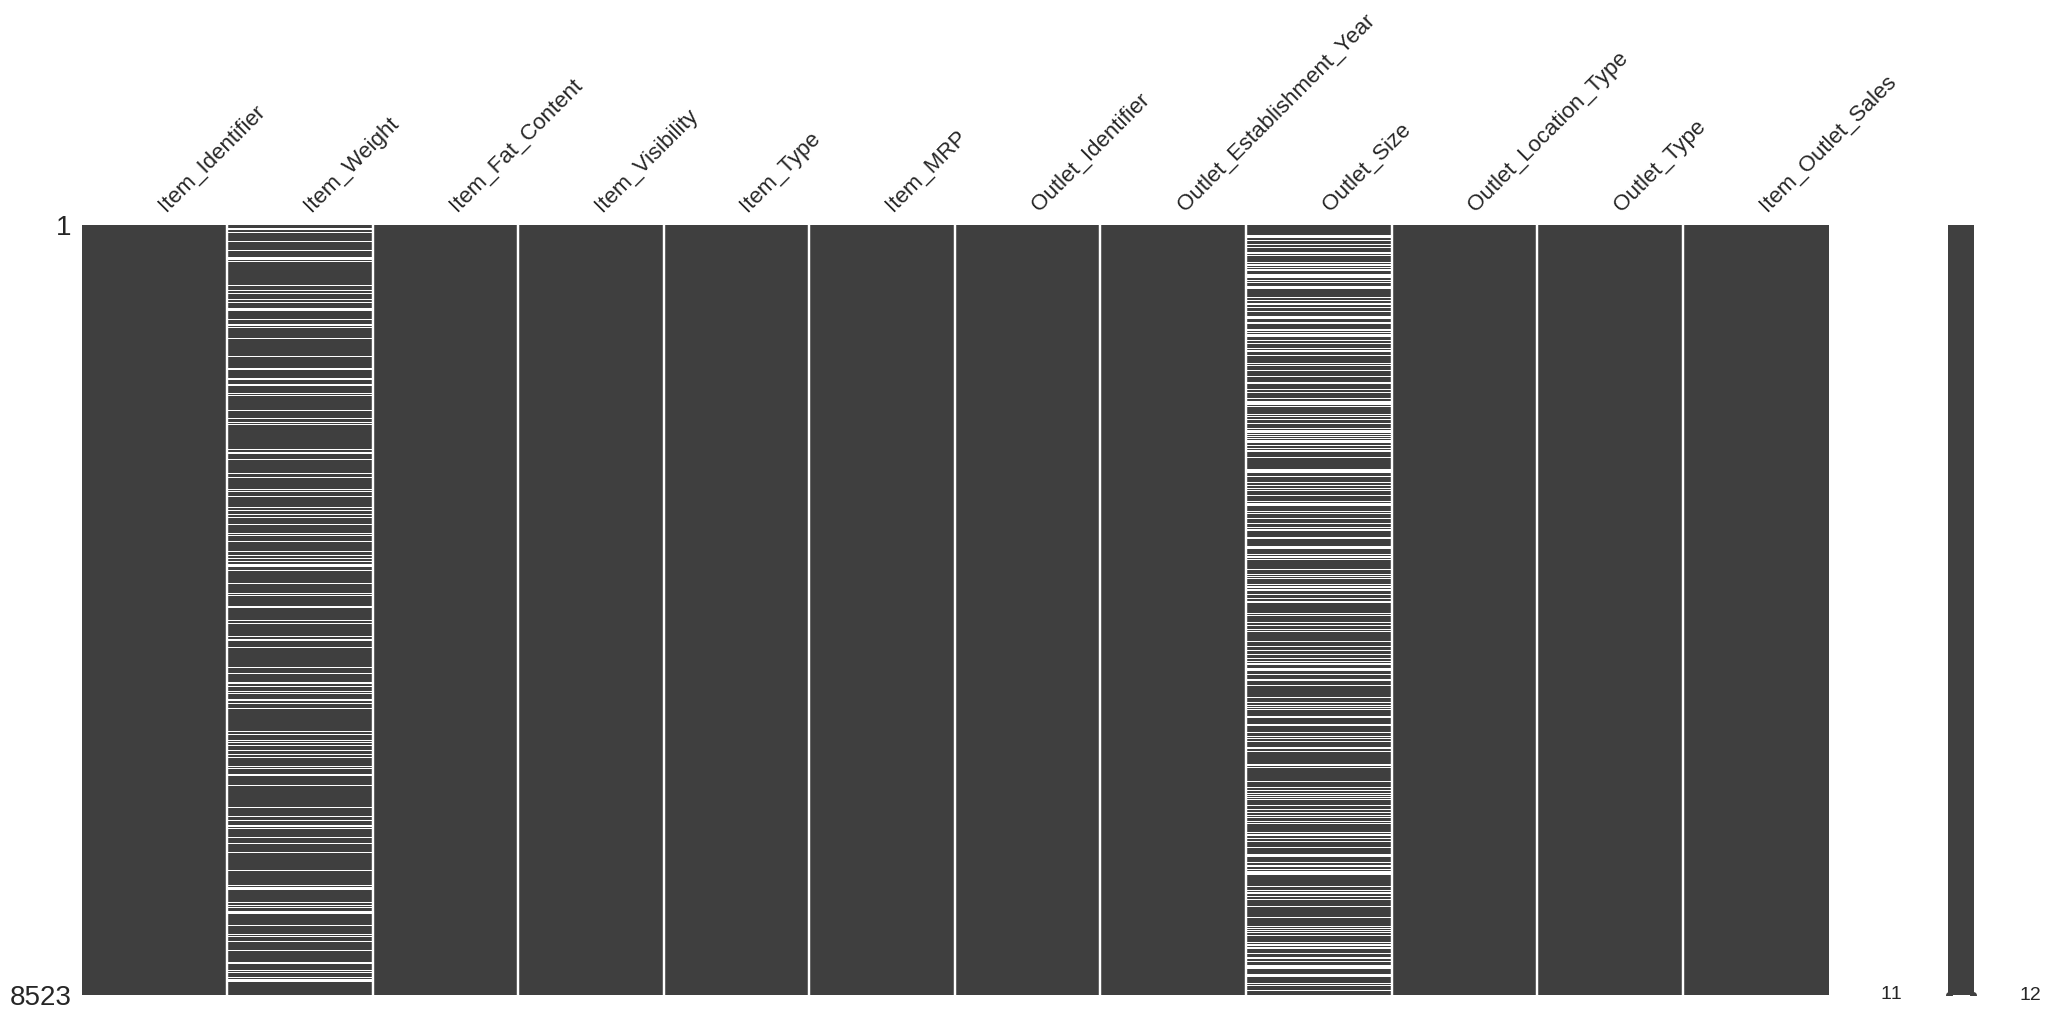

In [11]:
msno.matrix(df)

We can see that we have only two vectors with missing values , let's check them up

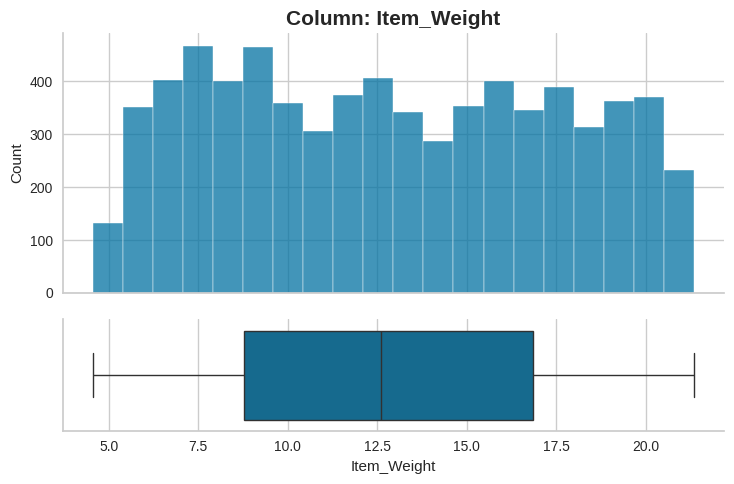

There are 1463 NaN (17.17%)
There are 415 unique values
The most common value is nan, occurs 1463 times (17.17%)
Item_Weight: is neither constant nor a quasi-constant feature and should be kept


In [12]:
# Item Weight
explore_num(df,'Item_Weight');

we should impute the missing values with the mean .

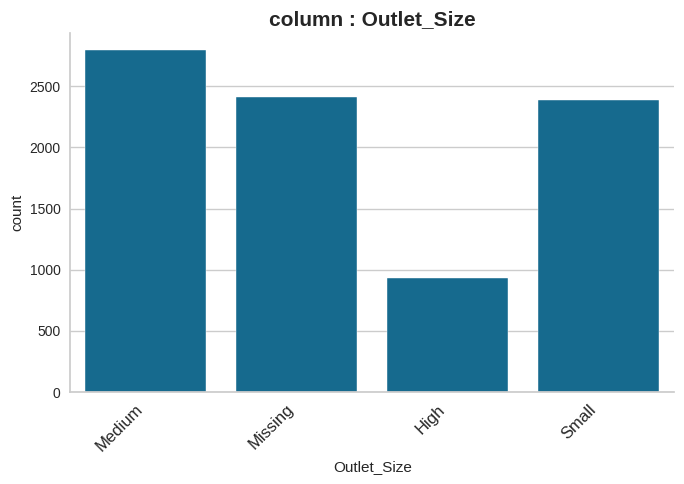

There is 2410 NaN (28.28%)
There is 4 unique values
The most common value is Medium , occurs 2793 times (32.77%)
Outlet_Size: is neither constant or a quasi-constant feauture and should be kept


In [13]:
# Outlet Size
explore_cat(df,'Outlet_Size');

we should use mode to impute the missing values .

In [14]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year','Item_Outlet_Sales']
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [16]:
df[num_cols].describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.64,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,8.77,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


<Axes: >

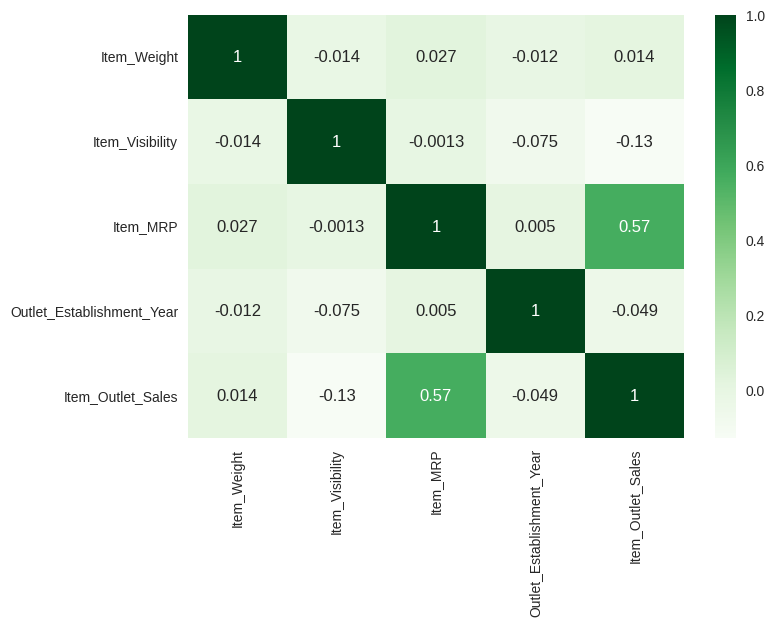

In [17]:
corr = df[num_cols].corr()
sns.heatmap(corr, cmap = 'Greens' , annot = True)

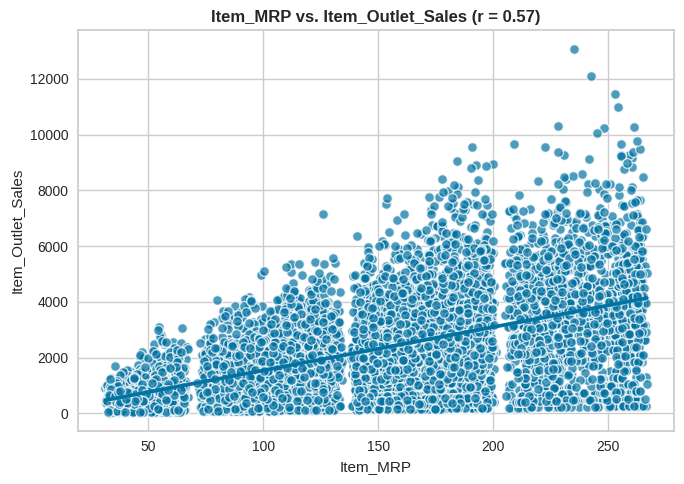

In [18]:
plot_num_vs_target(df,'Item_MRP',y='Item_Outlet_Sales');

It goes up when the outlet price goes up .

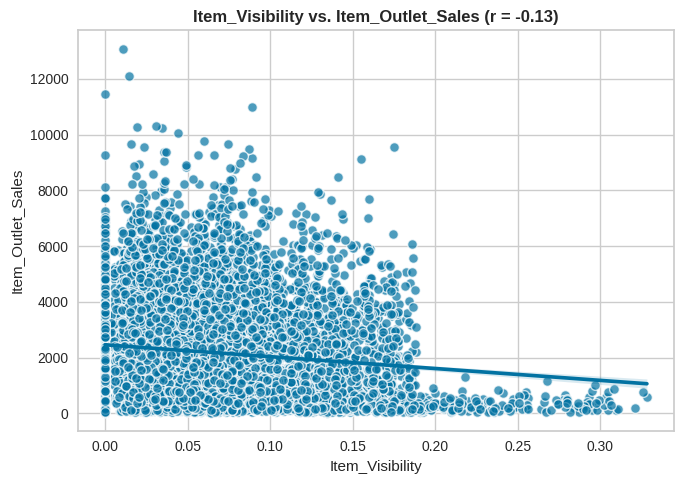

In [19]:
plot_num_vs_target(df,'Item_Visibility',y='Item_Outlet_Sales');

It goes down when the outlet price goes up .

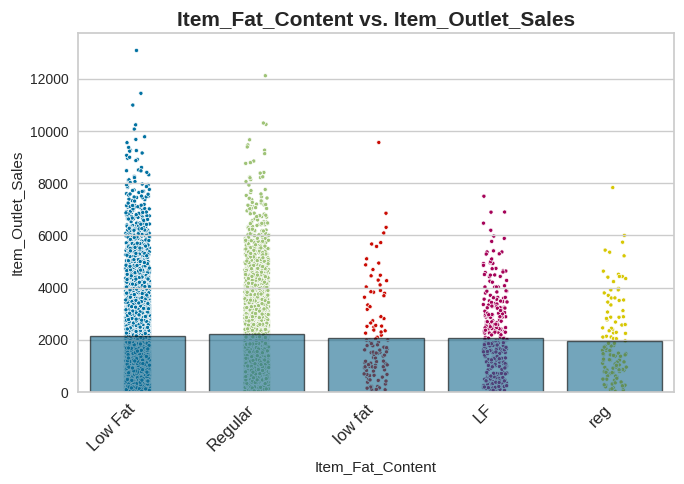

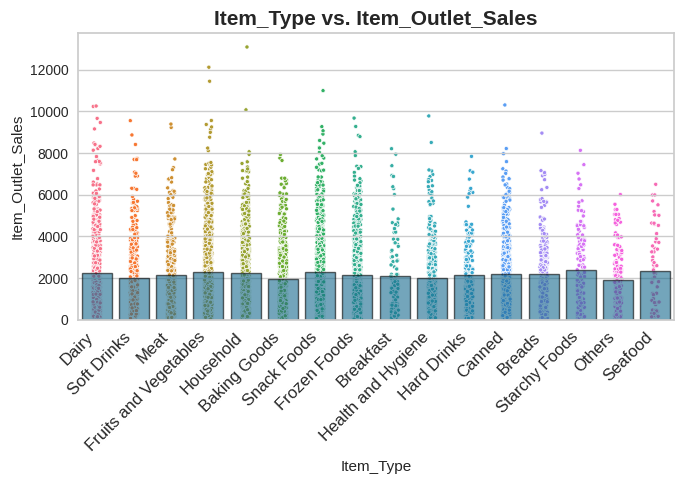

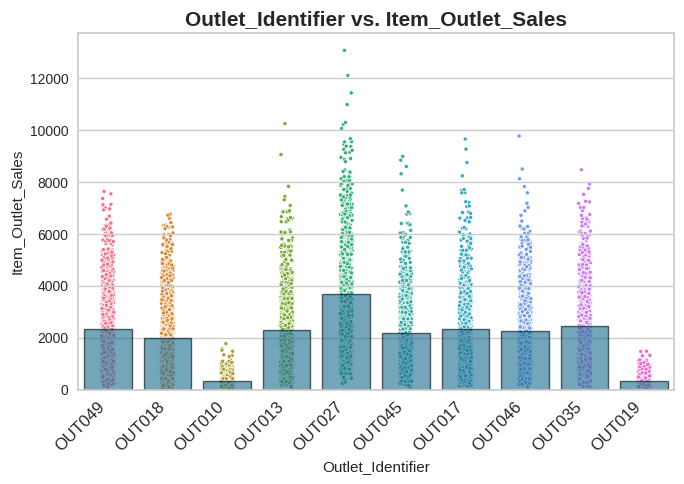

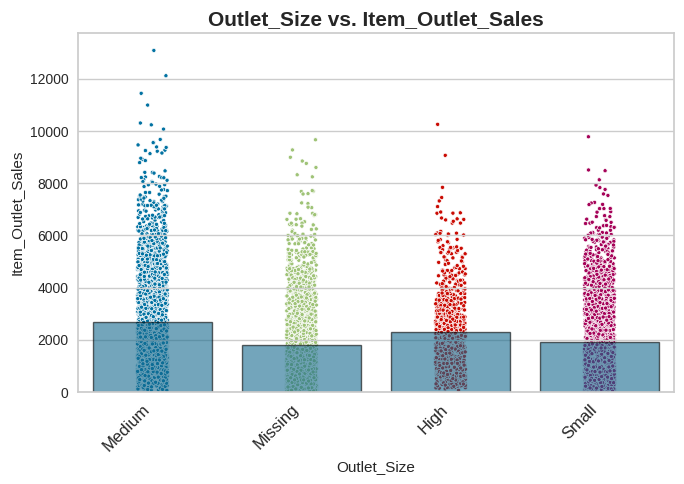

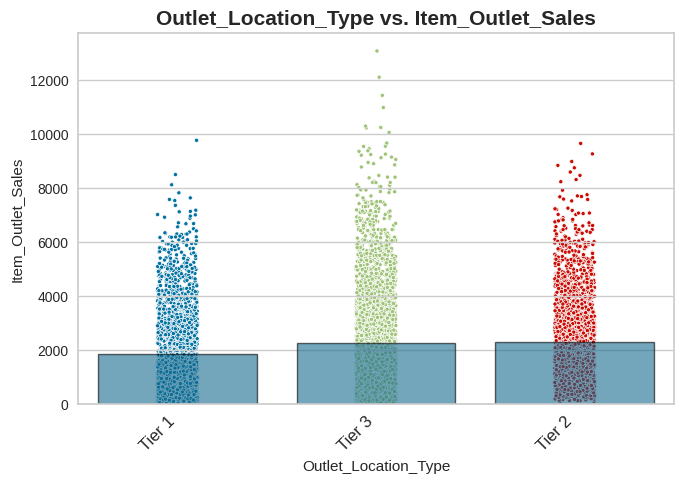

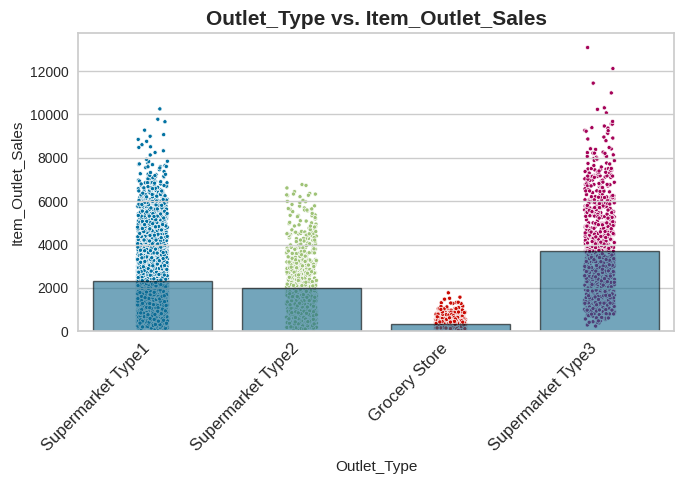

In [20]:
for i in cat_cols:
  plot_cat_vs_target(df,i,y='Item_Outlet_Sales');

In [21]:
replacement_map = {'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(replacement_map)

In [22]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [23]:
target = 'Item_Outlet_Sales'
y = df[target].copy()
X = df.drop(target,axis=1).copy()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 420)

In [25]:
num_col = X_train.select_dtypes('number').columns
ord_col = ['Outlet_Size']
cat_col = X_train.select_dtypes('object').drop(columns='Outlet_Size').columns

In [26]:
scaler = StandardScaler()
num_imputer = SimpleImputer(strategy='mean')
ord_imputer = SimpleImputer(strategy='most_frequent')
cat_encoder = OneHotEncoder(sparse_output=False , handle_unknown='ignore' )
ord_order = ['Small', 'Medium' , 'High']
ord_encoder = OrdinalEncoder(categories=[ord_order])

In [27]:
num_pipe = make_pipeline(num_imputer , scaler)
cat_pipe = make_pipeline(cat_encoder)
ord_pipe = make_pipeline(ord_imputer,ord_encoder)

In [28]:
transformer = ColumnTransformer([('num',num_pipe,num_col),('ord',ord_pipe,ord_col),('cat',cat_pipe,cat_col)])

In [29]:
X_train_tr = transformer.fit_transform(X_train)
X_test_tr = transformer.transform(X_test)

## Model Selection

In [30]:
_ = setup(data=X_train_tr,target=y_train,session_id=420)

,Description,Value
0,Session id,420
1,Target,Item_Outlet_Sales
2,Target type,Regression
3,Original data shape,"(6392, 1593)"
4,Transformed data shape,"(6392, 1593)"
5,Transformed train set shape,"(4474, 1593)"
6,Transformed test set shape,"(1918, 1593)"
7,Numeric features,1592
8,Preprocess,True
9,Imputation type,simple


In [31]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,785.0778,1252542.2980,1118.1529,0.5859,0.5622,0.6018,8.3890
xgboost,Extreme Gradient Boosting,802.4690,1318129.1500,1147.0061,0.5640,0.5653,0.5943,3.4910
br,Bayesian Ridge,854.1724,1334636.3875,1153.8410,0.5592,0.7209,1.0350,4.3820
lasso,Lasso Regression,854.9773,1346811.4375,1159.0943,0.5552,0.7343,1.0309,1.5740
lightgbm,Light Gradient Boosting Machine,808.7207,1355818.8229,1163.3140,0.5514,0.5658,0.5848,1.6700
rf,Random Forest Regressor,809.2656,1364791.6318,1167.3444,0.5485,0.5483,0.5472,18.1240
par,Passive Aggressive Regressor,909.2329,1505510.5105,1225.5207,0.5024,0.7587,1.0552,15.0060
ada,AdaBoost Regressor,951.9414,1512644.0406,1227.4587,0.4994,0.8315,1.2758,8.4400
omp,Orthogonal Matching Pursuit,896.3839,1526614.1250,1234.4842,0.4945,0.7484,1.0431,0.8280
et,Extra Trees Regressor,854.3812,1533424.6796,1237.6204,0.4913,0.5762,0.5576,32.8460


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

GradientBoostingRegressor(random_state=420)

In [32]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [33]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics
def evaluate_regression (reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False) :
   y_train_pred = reg.predict(X_train)
   results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
   y_test_pred = reg.predict(X_test)
   results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )
   if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    results_df = results_df.set_index('Label')
    results_df.index.name=None
    return results_df.round(3)


In [34]:
xgb_model = XGBRegressor()
linear_reg_model = LinearRegression()
dcr_model = DecisionTreeRegressor()
gbr_model = GradientBoostingRegressor()

In [35]:
xgb_model.fit(X_train_tr,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
linear_reg_model.fit(X_train_tr,y_train)

LinearRegression()

In [37]:
dcr_model.fit(X_train_tr,y_train)

DecisionTreeRegressor()

In [38]:
gbr_model.fit(X_train_tr,y_train)

GradientBoostingRegressor()

# Evaluation

In [39]:
regs = [xgb_model,linear_reg_model,dcr_model,gbr_model]
for i in regs:
  print(i)
  evaluate_regression(i,X_train_tr,y_train,X_test_tr,y_test)
  print(f'{"-"*60}\n')

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 646.338
- MSE = 798,168.520
- RMSE = 893.403
- R^2 = 0.730
------------------------------

- XGBRegressor : seems to do ok in the trainig and then drop in the test with r2 = 0.55.

- LinearRegression : have r2 = 0.6 in the trainig but have a huge drop in the test .

-DecisionTreeRegressor : the model is overfitting the data.

-GradientBoostingRegressor : comparing between the train and test set the r2 is not that promissing .

In [40]:
regs = [xgb_model,linear_reg_model,dcr_model,gbr_model]
for i in regs:
  print(i)
  print(f'{"-"*60}\n')
  print(i.get_params())
  print(f'{"-"*60}\n')

## XGB Regressor

In [41]:
xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [42]:
xgb_params = {'max_depth' :  [None,6,10,4],
              'n_estimators' : [100,200,400],
              'max_leaves':[None,2,5,8]}
xgb_grid = GridSearchCV(xgb_model,xgb_params)
xgb_grid.fit(X_train_tr,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...ne,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [None, 6, 10, 4],
                         'max_leaves': [None, 2, 5, 8],
                         'n_estimators': [100, 200, 400]})

In [43]:
best_xgb = xgb_grid.best_estimator_

## Linear Regression

In [44]:
linear_reg_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [45]:
lr_params = {'copy_X' : [True, False],
              'fit_intercept' :  [True , False],
              'positive' : [False, True],
             'n_jobs':[None , 1 , -1]}
lr_grid = GridSearchCV(linear_reg_model,lr_params)
lr_grid.fit(X_train_tr,y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [None, 1, -1], 'positive': [False, True]})

In [46]:
best_lr = lr_grid.best_estimator_

## Decision Tree Regression

In [47]:
dcr_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [48]:
dcr_params = {'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
              'splitter':['best', 'random'],
              'max_depth':[None,6,10,4]}
dcr_grid = GridSearchCV(dcr_model,dcr_params)
dcr_grid.fit(X_train_tr,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [None, 6, 10, 4],
                         'splitter': ['best', 'random']})

In [49]:
best_dcr = dcr_grid.best_estimator_

## Gradient Boosting Regressor

In [50]:
gbr_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [52]:
gbr_params = {'n_estimators' : [100,200,400],
              'criterion' : ['friedman_mse', 'squared_error'],
              'max_depth':[None,6,10,4]}
gbr_grid = GridSearchCV(gbr_model,gbr_params)
gbr_grid.fit(X_train_tr,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'max_depth': [None, 6, 10, 4],
                         'n_estimators': [100, 200, 400]})

In [53]:
best_gbr = gbr_grid.best_estimator_

# Final Evaluation

In [54]:
best_regs = [best_xgb,best_lr,best_dcr,best_gbr]
for i in best_regs:
  print(i)
  evaluate_regression(i,X_train_tr,y_train,X_test_tr,y_test)
  print(f'{"-"*60}\n')

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=5,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 727.229
- MSE = 1,031,343.961
- RMSE = 1,015.551
- R^2 = 0.651
------------------------------